## Path-Tracing！！


### 1.背景知识简介

先贴上大名鼎鼎的渲染方程hhh还有一些名词

![image.png](attachment:image.png

radiant flux/power：单位时间辐射的量的度量单位w

Radiant Intensity：单位时间单位立体角的...

Irradiance：单位时间单位面积的...(这里注意面积是要转化的，是要用有效面积）

Radiance:单位时间单位面积来自某一立体角的....就是方差中的L(p,w）

我们对利用Radiance对立体角进行积分就能得到Irradiance

我们现在引入了更高级的渲染方程还有BRDF！！BRDF相当于定义了一个表面的材质

最后我们在引入蒙特卡洛积分就可以进行下面的path-----tracing了

蒙特卡洛积分就是大量抽样然后模拟计算积分。
####  α.why?
原因就是我们的之前的光线追踪算法还是不够仿真，我们有太多简化性的假设，导致最后结果不佳。

#### β.how?
在进入how之前我们有两个待解决的问题

1.我们的path——tracing需要打出来很多的光线啊，那么假设我们每一条光线重新变成两条那么多次弹射后就是指数级别的光线，那肯定时间复杂度爆炸
怎么办呢？就只发一条.......这里处理的好草率，我觉得一定是有误差，不过没有别的好办法（这里虽然是一条但是仔细想一下，它撞到物体会返回来一条，然后还会再发射一条的）。。。为了一定程度上综合这一点误差，我们选择在源头治理-----对于每个像素点发射很多个ray

2.我们无限弹射那不凉了，程序跑不完了。所以呢---概率性发射，每次我们以80%概率发射最后我们就会收敛
同时我们能够得到的像素点值的期望还和真实值相等（这个写一下比较好验证）


### 2.框架关键点解释

要完成这个任务点，至关重要的就是读懂框架，其实实现起来很简单。

一条线我们从main出发可以看到了初始化场景--物体--BVH划分

另一条线我们可以从render出发去缕清晰框架，那里发射出来了光线---接着我们就要cast这个ray---转到部分3去看---castray会调用各种相交函数---求交之后我们就用的到材料的性质（BRDF）然后去计算最终结果


### 3.需要自己实现的部分
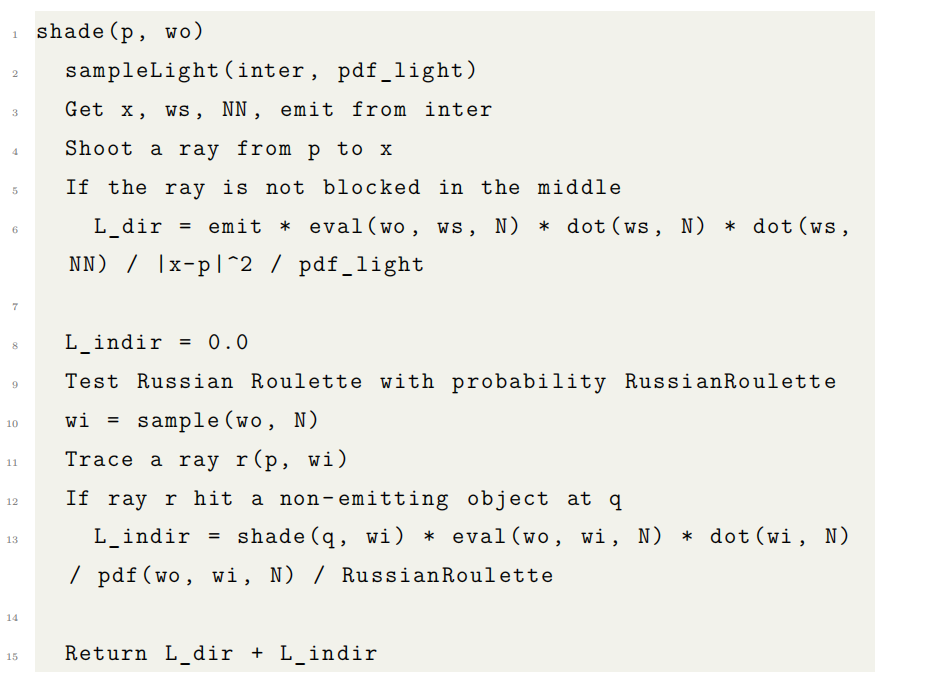

（这是games101给出的本任务点框架，话说框架都给到这个程度了，我们只要读懂总的框架然后注意下细节就行了）

castray（）

这里回顾我们要具体怎么实现--分为光源和其他光，我们首先是考虑光源   做一个积分变量的代换我们可以得到一个直接在光源上取样的积分公式，这样剩了我们白白发射很多光线（体现在我们发现照射到物体后我们以一定的概率又发射了光线，这里如果再交到光源我们就没必要继续追踪这个又发射出来的光线咯）

然后我们照射到物体就开始看看下是否中奖（继续弹射）不弹就直接return 弹射就递归cast新的ray（如果这个ray不是交到了光源）然后return 总的l_dir+l_indir  （dir：直接）

### 4.一些有价值的问题:
1.有个超有意思的问题，蒙特卡洛积分我们可以做到无偏估计，同是无偏估计我们就方差越小越好，但是如果有一个估计他不是无偏估计，但是他方差很小，我们要怎么做选择呢？  ----事实上2022年考研最后一道概率大题就是一道类似的题目，简单的做当然很简单，不过我想了一些别的东西然后还验证了下我的方法是要比最后答案给的方法在某些样本上估计更优的不过结果应该给了我0分哈哈哈o(╥﹏╥)o。

2.我们如何做蒙特卡洛积分会更好呢（采样函数的选择）

3.这个BRDF好神奇啊他们是有一个官方标准来定义吗